In [22]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import genpareto
import scipy.stats as stats

In [3]:
data = pd.read_excel('MasterAllocation.xlsx',sheet_name='Summary',index_col='Date')

C:\Users\raphaelfeijao\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


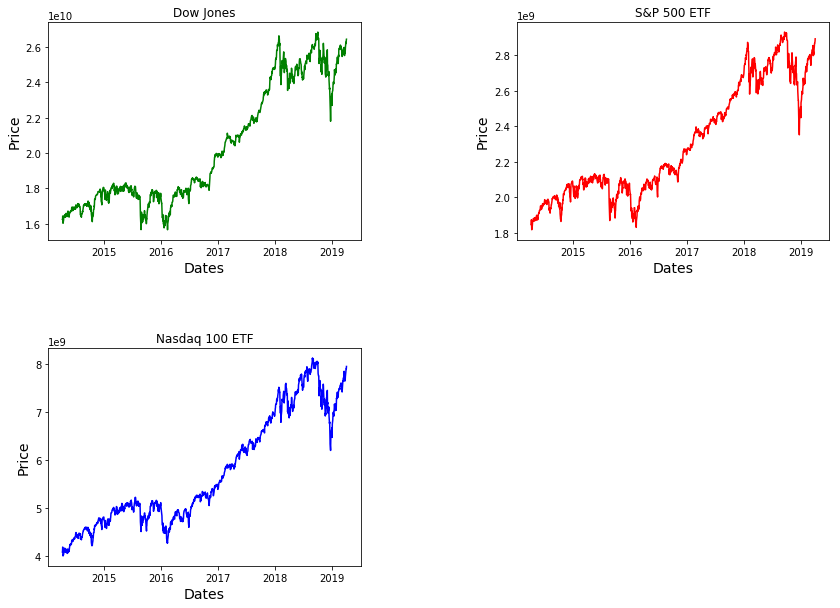

In [4]:
fig1 =plt.figure(figsize=(14,10))
plt.subplots_adjust(hspace=.5,wspace=.5) # it adds space in between plots

plt.subplot(221)
ax = plt.gca()
ax.plot(data['DOW'], color = 'green')
ax.set_xlabel('Dates',fontsize=14)
ax.set_ylabel('Price',fontsize =14)
ax.set_title('Dow Jones')

plt.subplot(222)
ax = plt.gca()
ax.plot(data['SEP'], color = 'red')
ax.set_xlabel('Dates',fontsize =14)
ax.set_ylabel('Price',fontsize =14)
ax.set_title('S&P 500 ETF')

plt.subplot(223)
ax = plt.gca()
ax.plot(data['NASDAQ'], color ='blue')
ax.set_xlabel('Dates',fontsize =14)
ax.set_ylabel('Price',fontsize =14)
ax.set_title('Nasdaq 100 ETF')

plt.show();
fig1.savefig('prices.png',dpi=fig1.dpi)

In [5]:
normalized_series = (data/data.iloc[0])

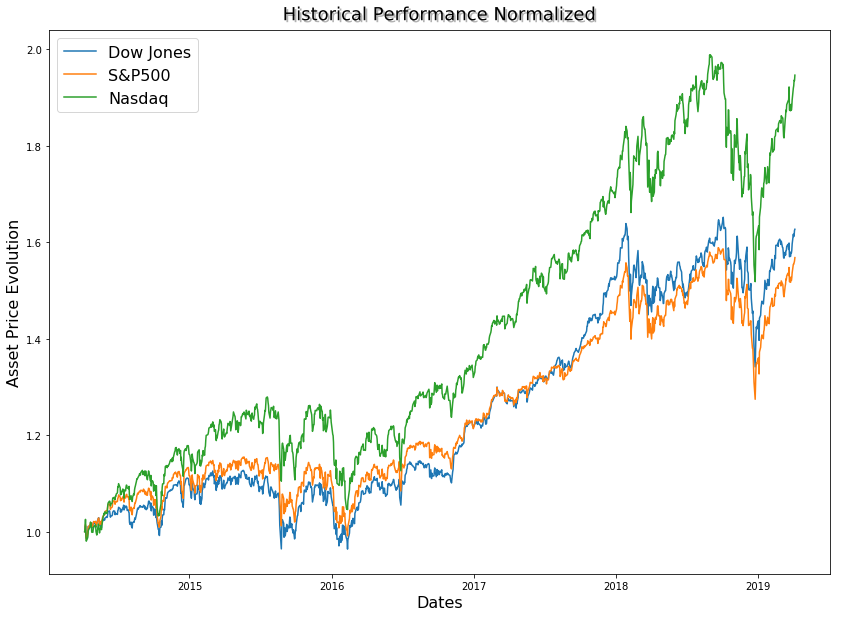

In [6]:
from matplotlib import patheffects
fig2 =plt.figure(figsize=(14,10))
plt.plot(normalized_series)

title_text_obj = plt.title("Historical Performance Normalized", fontsize = 18,
                          verticalalignment = 'bottom')
title_text_obj.set_path_effects([patheffects.withSimplePatchShadow()])
pe = patheffects.withSimplePatchShadow(offset = (1, -1), shadow_rgbFace = (1,0,0),
                                      alpha = 0.8)
xlabel_obj = plt.xlabel('Dates', fontsize = 16)
ylabel_obj = plt.ylabel('Asset Price Evolution', fontsize = 16)
#('DOW','SEP','Nasdaq')
plt.legend(('Dow Jones','S&P500','Nasdaq'),fontsize = 16)
plt.show()
fig2.savefig('norm_prices.png',dpi=fig2.dpi);

In [7]:
#Log-Result
data_returns = np.log(data/data.shift(1))
data_returns.dropna(inplace=True) #This will desconsiderate the first prices 

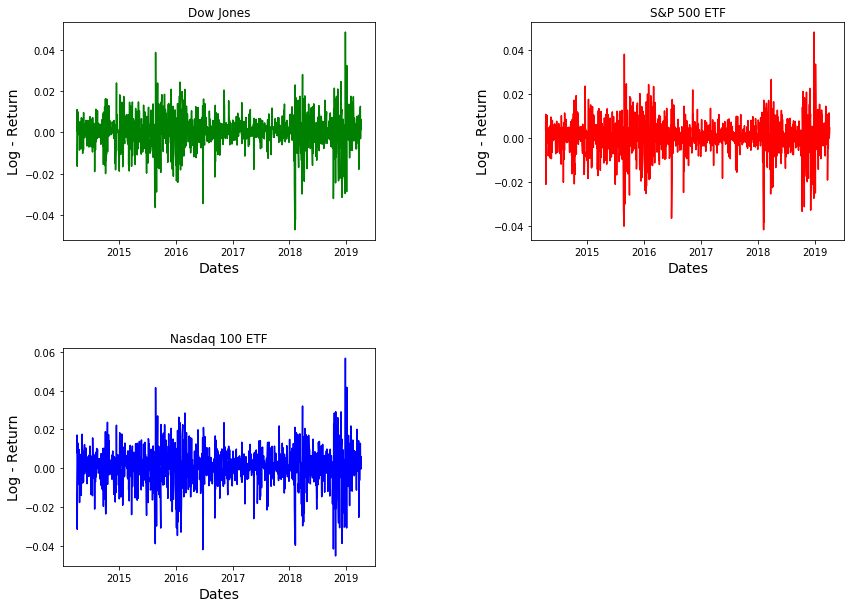

In [8]:
fig2 =plt.figure(figsize=(14,10))
plt.subplots_adjust(hspace=.5,wspace=.5) # it adds space in between plots

plt.subplot(221)
ax = plt.gca()
ax.plot(data_returns['DOW'], color = 'green')
ax.set_xlabel('Dates',fontsize=14)
ax.set_ylabel('Log - Return',fontsize =14)
ax.set_title('Dow Jones')

plt.subplot(222)
ax = plt.gca()
ax.plot(data_returns['SEP'], color = 'red')
ax.set_xlabel('Dates',fontsize =14)
ax.set_ylabel('Log - Return',fontsize =14)
ax.set_title('S&P 500 ETF')

plt.subplot(223)
ax = plt.gca()
ax.plot(data_returns['NASDAQ'], color ='blue')
ax.set_xlabel('Dates',fontsize =14)
ax.set_ylabel('Log - Return',fontsize =14)
ax.set_title('Nasdaq 100 ETF')

plt.show();
fig2.savefig('log_return.png',dpi=fig2.dpi)

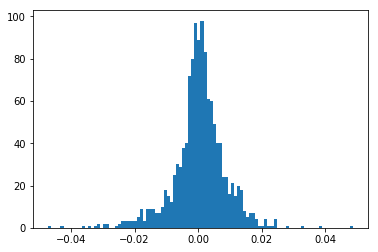

In [143]:
plt.hist(data_returns['DOW'], bins =100)
plt.show()

In [9]:
weeks = 52
Annualized_Return = data_returns.mean() * weeks *100
print("Return in average by year (%)")
print(Annualized_Return)

Return in average by year (%)
DOW       2.010852
SEP       1.858868
NASDAQ    2.751754
dtype: float64


In [10]:
from scipy.stats import genpareto

In [11]:
genpareto.fit(data_returns['NASDAQ'])


C:\Users\raphaelfeijao\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2248: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)
C:\Users\raphaelfeijao\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1035: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
C:\Users\raphaelfeijao\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2316: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


(1.2005311275543225, -0.04526298471503913, 0.05266001216761028)

In [13]:
r = genpareto.rvs(1.2, size = 100000)

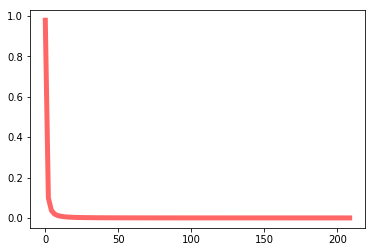

In [15]:
b = 1.2
fig, ax = plt.subplots(1, 1)
x = np.linspace(genpareto.ppf(0.01, b),
                 genpareto.ppf(0.99, b), 100)
ax.plot(x, genpareto.pdf(x, b),
          'r-', lw=5, alpha=0.6, label='genpareto pdf')
plt.show()

In [2]:
import statsmodels.api as sm

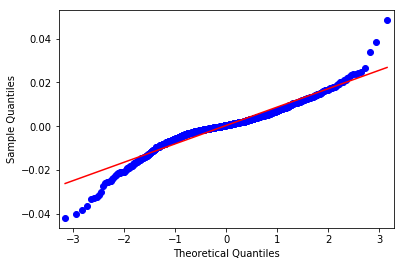

In [140]:
sm.qqplot(data_returns['SEP'],line='s')
plt.show()

In [169]:
def Hill_estimator(X):
    X = np.log(np.array(X))
    X1 = X[0]
    return np.sum(X[1:])/(len(X)+1) - X1

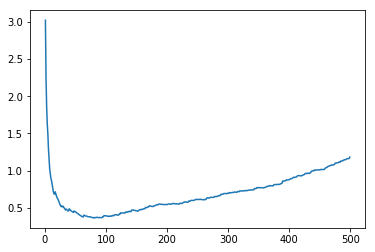

In [170]:
hill_variation = []
asset = 'DOW'
n = len(data_returns[asset])
Sort = sorted(data_returns[asset])
x = np.arange(1,500,1)
for i in x:
    hill_variation.append(Hill_estimator(Sort[n-i:]))
plt.plot(x, hill_variation)
plt.show()

In [175]:
k = 60
epsilon = Hill_estimator(sorted(data_returns[asset])[n-k:n])
var_hill = (k/n/(1-0.9999))**epsilon*sorted(data_returns[asset])[n-k]
print(var_hill)

0.1478599063754738


In [132]:
def Var_hill (X, k):
    epsilon = Hill_estimator(sorted(X)[n-k:n])
    var_hill = (k/n/(1-0.9999))**epsilon*sorted(X)[n-k]
    return var_hill

In [ ]:
def ChosingPortifolio (data):
    